In [22]:
from sklearn.impute import SimpleImputer
from sklearn.base import TransformerMixin
import pandas as pd
import numpy as np
from impyute.imputation.cs import mice
import seaborn as sns
import matplotlib.pyplot as plotting
import warnings
warnings.filterwarnings("ignore")
sns.set_palette("pastel")

pd.set_option('display.max_columns', None)
pd.set_option('max_colwidth', None)

class CustomImputer(TransformerMixin):
    def __init__(self, cols=None, strategy='median'):
        self.cols = cols
        self.strategy = strategy

    def transform(self, df):
        X = df.copy()
        impute = SimpleImputer(strategy=self.strategy)
        if self.cols == None:
            self.cols = list(X.columns)
        for col in self.cols:
            if X[col].dtype == np.dtype('O') : 
                X[col].fillna(X[col].value_counts().index[0], inplace=True)
            else : 
                X[col] = impute.fit_transform(X[[col]])

        return X

    def fit(self, *_):
        return self


def plottings(wines):
    with plotting.style.context('seaborn-bright'):
        fig, (ax1, ax2) = plotting.subplots(nrows=2, ncols=1, sharex=False, figsize=(8, 10))

    heatmap1 = sns.heatmap(wines.isnull(),yticklabels=False,cbar=False,cmap='cividis',alpha=0.6, ax=ax1)
    heatmap1.set_title("Heatmap showing the missing values")

    null_values = wines.isnull().sum(axis=0)
    null_values /= len(wines.index)

    plotting1 = null_values.plot(kind='bar', color='darkorange', x=null_values.values, 
                           y=null_values.index, ax=ax2, width=1, linewidth=1, 
                           edgecolor='black', align='edge', label='Null value rate')
    plotting1.set_title("Null value rate per column")

    ax2.set_ylim((0,1))
    labels=wines.columns
    ticks = np.arange(0.5, len(labels))
    ax2.xaxis.set(ticks=ticks, ticklabels=labels)

    ax2.spines['top'].set_color('black')
    ax2.spines['right'].set_color('black')
              
    
    na_ticks = ticks[(null_values > 0) & (null_values < 0.05)]
    if (len(na_ticks) > 0):
        ax2.plot(na_ticks, [0,]*len(na_ticks), 's', c='darkorange', markersize=10, 
        label='Very few missing values')
    
    ax2.legend()
    plotting.show()

<p> I have taken the Wine review dataset from kaggle. This dataset has lot of missing values which can be imputated.
    Out of the 11 columns, I have chose 4 variables/columns for data imputation.</p>

In [23]:
df = pd.read_csv('wine-data.csv')
print(df.head())
print("\n\nThe four variables to be used for imputation are")
print("One numerical variable - Price")
print("Three categorical variables - Country, Designation and Province")

   Unnamed: 0   country  \
0           0     Italy   
1           1  Portugal   
2           2        US   
3           3        US   
4           4        US   

                                                                                                                                                                                                                                                 description  \
0                                                                               Aromas include tropical fruit, broom, brimstone and dried herb. The palate isn't overly expressive, offering unripened apple, citrus and dried sage alongside brisk acidity.   
1                        This is ripe and fruity, a wine that is smooth while still structured. Firm tannins are filled out with juicy red berry fruits and freshened with acidity. It's  already drinkable, although it will certainly be better from 2016.   
2                                                                 Tar

In [24]:
wines = df.drop(columns=['Unnamed: 0','description','points','region_1','region_2','taster_name','taster_twitter_handle','title','variety','winery'])
print("\nThe number of missing values are")
print(wines.isnull().sum())


The number of missing values are
country           63
designation    37465
price           8996
province          63
dtype: int64



1.MEDIAN IMPUTATION

The unfilled head of dataset is shown below
    country                         designation  price           province
0     Italy                        Vulkà Bianco    NaN  Sicily & Sardinia
1  Portugal                            Avidagos   15.0              Douro
2        US                                 NaN   14.0             Oregon
3        US                Reserve Late Harvest   13.0           Michigan
4        US  Vintner's Reserve Wild Child Block   65.0             Oregon


Before the median imputation, the heatmap and bar plots look likes this


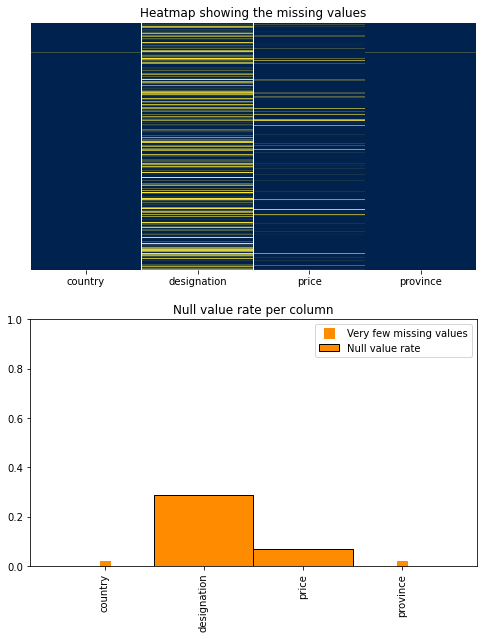


After the median imputation, the heatmap and bar plots look likes this


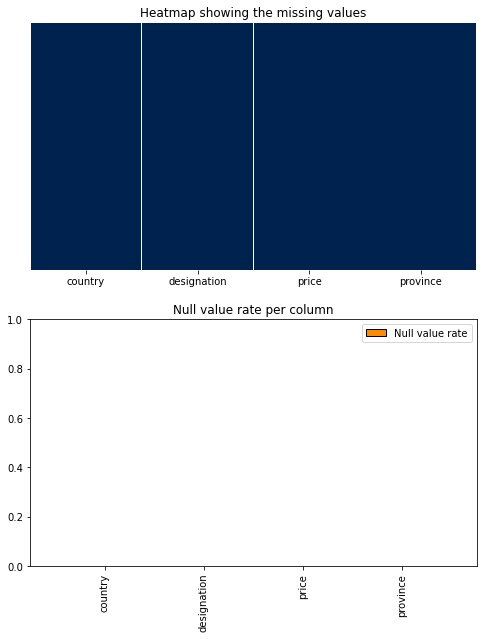


The number of null values is reduced to zero after the median imputation
country        0
designation    0
price          0
province       0
dtype: int64


The filled head of dataset is shown below
    country                         designation  price           province
0     Italy                        Vulkà Bianco   25.0  Sicily & Sardinia
1  Portugal                            Avidagos   15.0              Douro
2        US                             Reserve   14.0             Oregon
3        US                Reserve Late Harvest   13.0           Michigan
4        US  Vintner's Reserve Wild Child Block   65.0             Oregon


In [25]:
print("\n1.MEDIAN IMPUTATION\n\nThe unfilled head of dataset is shown below")
print(wines.head())
print("\n\nBefore the median imputation, the heatmap and bar plots look likes this")
plottings(wines)
wines.price.fillna(wines.price.dropna().median(),inplace =True)
columnsList = list(wines.columns)
columnsList.remove('price')
cci = CustomImputer(columnsList)
wines = cci.transform(wines)
print("\nAfter the median imputation, the heatmap and bar plots look likes this")
plottings(wines)
print("\nThe number of null values is reduced to zero after the median imputation")
print(wines.isnull().sum())
print("\n\nThe filled head of dataset is shown below")
print(wines.head())


2.MOST FREQUENT VALUES IMPUTATION

The number of missing values are
country           63
designation    37465
price           8996
province          63
dtype: int64


The unfilled head of dataset is shown below.
    country                         designation  price           province
0     Italy                        Vulkà Bianco    NaN  Sicily & Sardinia
1  Portugal                            Avidagos   15.0              Douro
2        US                                 NaN   14.0             Oregon
3        US                Reserve Late Harvest   13.0           Michigan
4        US  Vintner's Reserve Wild Child Block   65.0             Oregon


Before the most frequent values imputation, the heatmap and bar plots look likes this


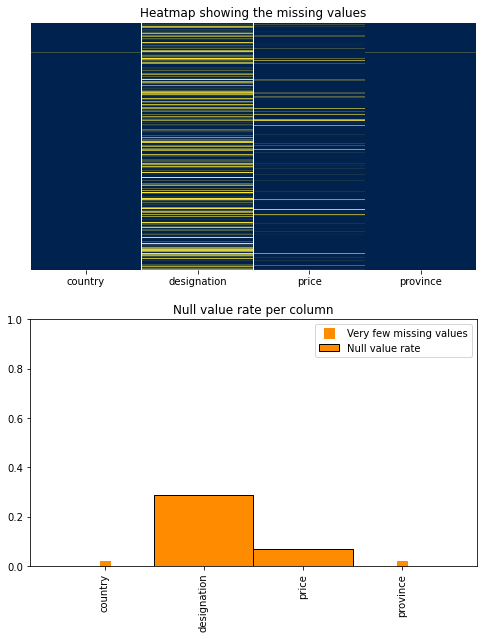


After the most frequent values imputation, the heatmap and bar plots look likes this


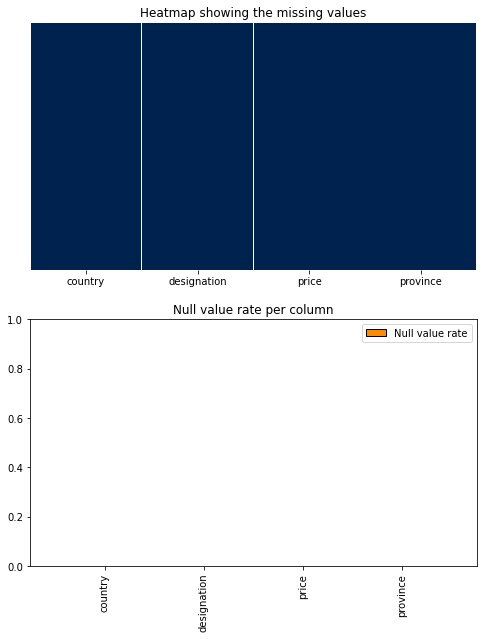


The number of null values is reduced to zero after the most frequent values imputation
country        0
designation    0
price          0
province       0
dtype: int64


The filled head of dataset is shown below
    country                         designation price           province
0     Italy                        Vulkà Bianco    20  Sicily & Sardinia
1  Portugal                            Avidagos    15              Douro
2        US                             Reserve    14             Oregon
3        US                Reserve Late Harvest    13           Michigan
4        US  Vintner's Reserve Wild Child Block    65             Oregon


In [26]:
print("\n2.MOST FREQUENT VALUES IMPUTATION")
wines1 = df.drop(columns=['Unnamed: 0','description','points','region_1','region_2','taster_name','taster_twitter_handle','title','variety','winery'])
print("\nThe number of missing values are")
print(wines1.isnull().sum())
print("\n\nThe unfilled head of dataset is shown below.")
print(wines1.head())
print("\n\nBefore the most frequent values imputation, the heatmap and bar plots look likes this")
plottings(wines1)
imp_mean = SimpleImputer(strategy='most_frequent')
imp_mean.fit(wines1)
imputed_train_df = imp_mean.transform(wines1)
resultant_df = pd.DataFrame(imputed_train_df, columns =['country','designation','price','province'])
print("\nAfter the most frequent values imputation, the heatmap and bar plots look likes this")
plottings(resultant_df)
print("\nThe number of null values is reduced to zero after the most frequent values imputation")
print(resultant_df.isnull().sum())
print("\n\nThe filled head of dataset is shown below")
print(resultant_df.head())


3.MULTIVARIATE IMPUTATION BY CHAINED EQUATION(MICE)

The number of missing values are
country           63
designation    37465
price           8996
province          63
dtype: int64


Before the MICE imputation, the heatmap and bar plots look likes this


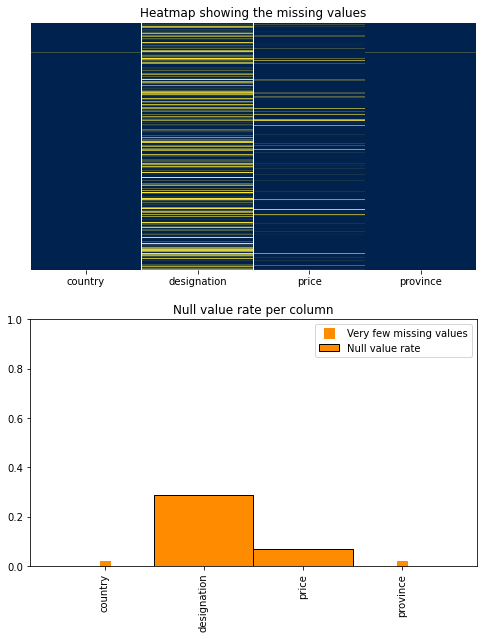



After the MICE imputation, the heatmap and bar plots look likes this


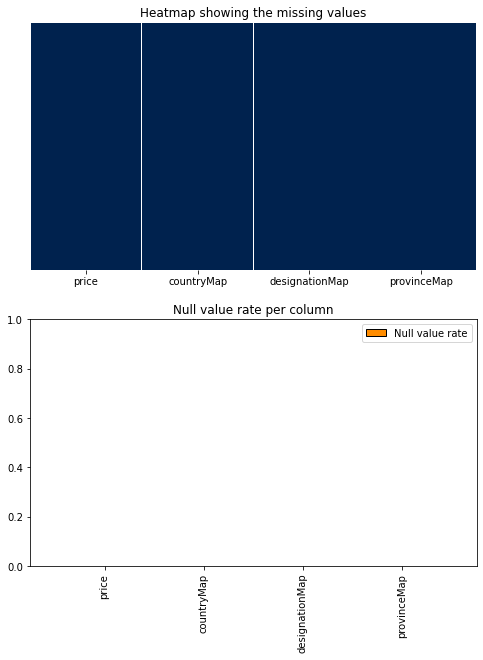


The number of null values is reduced to zero after the MICE imputation
price             0
countryMap        0
designationMap    0
provinceMap       0
dtype: int64


In [28]:
print("\n3.MULTIVARIATE IMPUTATION BY CHAINED EQUATION(MICE)")
wines2 = df.drop(columns=['Unnamed: 0','description','points','region_1','region_2','taster_name','taster_twitter_handle','title','variety','winery'])
print("\nThe number of missing values are")
print(wines2.isnull().sum())
print("\n\nBefore the MICE imputation, the heatmap and bar plots look likes this")
plottings(wines2)

countryUnique = wines2.country.unique()
uniqueCountries = list(countryUnique)
del uniqueCountries[18]

designationUnique = wines2.designation.unique()
uniqueDesignations = list(designationUnique)
del uniqueDesignations[2]

provinceUnique = wines2.province.unique()
uniqueProvinces = list(provinceUnique)
del uniqueProvinces[97]

dict_obj = {}
count=0
for i in uniqueCountries:
    dict_obj[i] = float(count)
    count+=1

dict_obj3 = {}
count=0
for i in uniqueProvinces:
    dict_obj3[i] = float(count)
    count+=1

dict_obj2 = {}
count=0
for i in uniqueDesignations:
    dict_obj2[i] = float(count)
    count+=1

wines2['countryMap'] = wines2.country.map(dict_obj)
wines2['designationMap'] = wines2.designation.map(dict_obj2)
wines2['provinceMap'] = wines2.province.map(dict_obj3)
wines2 = wines2.drop(columns=['country','designation','province'])
imputed_training=mice(wines2.values)
wines3 = pd.DataFrame(imputed_training, columns =['price','countryMap','designationMap','provinceMap'])

print("\n\nAfter the MICE imputation, the heatmap and bar plots look likes this")
plottings(wines3)
print("\nThe number of null values is reduced to zero after the MICE imputation")
print(wines3.isnull().sum())